In [55]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
# External libraries
import os as so
import sys as s
import pathlib as pl
import torch
import torch.nn as nn
from torch import Tensor
from torch.utils.data import random_split
from torch.utils.data import DataLoader, ConcatDataset
import torcheval
from torcheval.metrics import MulticlassF1Score, Mean
import optuna as opt
import torchvision as tn
import sklearn as sn
from sklearn.metrics import f1_score
import pandas as ps
import numpy as ny
import typing as t
import pathlib as pl
import matplotlib.pyplot as pt
import random as rng
from tqdm import tqdm
import tqdm as tm
from pprint import pprint
from git import Repo
import kornia as K
import kornia.augmentation as KA

In [57]:
# Add local package to path
if (p := pl.Path(so.getcwd(), '..').absolute().as_posix()) not in s.path:
    s.path.append(p)

# Local imports
from gic import *
from gic.data import MaskAugment, GenImageAugment, load_batched_data

In [58]:
# Load train data
train_lr, _, _ = load_batched_data(DATA_PATH, 'disjoint', batch_size=16, normalize=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


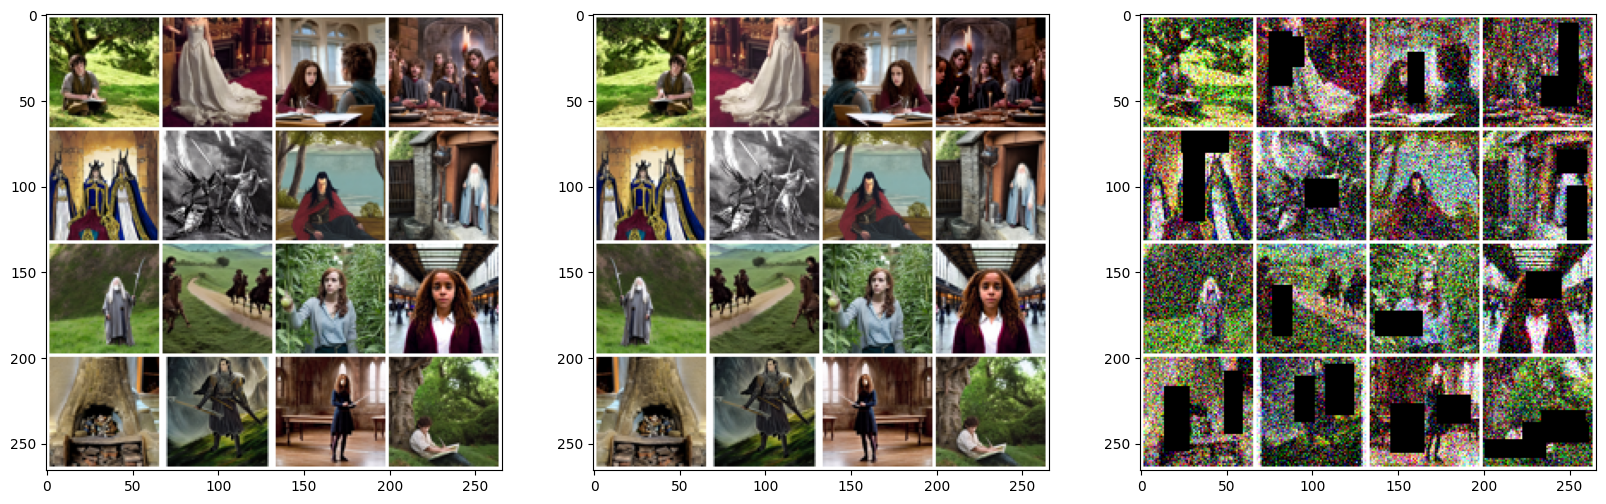

In [71]:

# Select operations
tr_raw = GenImageAugment(augment=True, normalize=False)
tr_augment = GenImageAugment(normalize=False)
tr_mask = MaskAugment()

# Create operations
X_raw, _ = next(iter(train_lr))
X_aug = tr_augment(X_raw)
X_mask = tr_mask(X_raw)

# Prepare Grid
raw_grid = tn.utils.make_grid(X_raw, nrow=4, pad_value=5)
aug_grid = tn.utils.make_grid(X_aug, nrow=4, pad_value=5)
mask_grid = tn.utils.make_grid(X_mask, nrow=4, pad_value=5)

# Display Grid
f, ax = pt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(raw_grid.permute((1, 2, 0)))
ax[1].imshow(aug_grid.permute((1, 2, 0)))
ax[2].imshow(mask_grid.permute((1, 2, 0)))
pt.show()